## Phase 3

### Header
#### Course Name: Data Intensive Computing - CS 587, Spring 2021
#### Project name: Crime Data Analysis
#### Name of group member: Anoosha Seelam, Viswapujitha Suresh

### Q Write down the following information: 
#### 1. Problem Statement: 
 *The aim of this project is to clean the data in a dataset, analyse it and generate a descriptive summary. The cleaned data  is used to generate a descriptive summary for the features and contents.  The dataset used [(NYPD Shooting Incident Data)](https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8/data) includes all shooting crimes reported to the New York City Police Department (NYPD) from 2006 to the end of 2019.One among the major crime activities in New York is "shootings" and many have occured until today. The city was expected to finish 2020 with a 14-year high in that category of violence, according to Police Commissioner Dermot Shea.People are not aware of these crimes and even after so many incidents till today and we haven't witnessed any decrease in this count. Victims range from 18 - 65 years old. Our dataset addresses a shooting episode in NYC and incorporates data about the occasion, the area, and season of event. Likewise, data identified with suspect and casualty demographics which we'll be able to obtain useful information for our anlaysis. It will provide a insight to what age category the perpetrators were and who are the major category of victims being attacked.It would also provide information about the crime hotspots of New York City.*



#### 2. Hypothesis:
   + hypothesis 1:  Suppose, police wants to patrol the cities in most-crime happening places. Let us assume that police knows all the crime locations and the time that the crime is occuring. We want to help them decide the locations and time where more patrolling has to be done.
   + hypothesis 2:  Suppose, STATISTICAL_MURDER_FLAG represents the safety of the neighbourhood as it says if the shooting resulted in a murder of the victim, we want to see if we can predict the safety of a location for a given particular time.
   + hypothesis 3: Suppose there is crime happened at a particular location at a particular time and we know all the victim's details like age, sex and race. We want to see what is the most probable race of the perpetrator.
   + hypothesis 4: Suppose there is crime happened at a particular location at a particular time and we know all the victim's details like age, sex and race. We want to see what age group does the perpetrator belong to.
   + hypothesis 5: Suppose, we want to estimate the BOROUGH in which crime might occur for a given crime details like time, victim details, criminal details etc.,

#### 3. Algorithms used:
   + K-Means Clustering
   + Logistic Regression
   + Decision Tree Classifier
   + Random forest Classifier
   + K-NN classifier

#### 4 Cleaned Datasets
Display the cleaned dataset after phase 1


In [1]:
# import your cleaned dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.graph_objects as go
# import plotly.express as px


df = pd.read_csv('data/cleaned_NYPD.csv')
df.drop(['time_SECOND'],axis=1,inplace=True)
# df.info()

# display the first five rows 
df.head(5)

,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,...,YEAR,WEEKDAY,time_HOUR,time_MINUTE,PERP_AGE_GROUP_MIN,PERP_AGE_GROUP_MAX,PERP_AGE_MEAN,VIC_AGE_GROUP_MIN,VIC_AGE_GROUP_MAX,VIC_AGE_MEAN
0,201575314,3,103,0.0,0,1,1,2,1,1,...,2019,0,22,10,18,24,21.0,25,44,34.5
1,205748546,0,40,0.0,0,7,1,2,1,0,...,2019,6,15,54,0,18,9.0,25,44,34.5
2,193118596,2,23,0.0,0,1,1,6,0,1,...,2019,2,19,40,18,24,21.0,18,24,21.0
3,204192600,4,121,0.0,1,3,1,2,1,0,...,2019,4,0,52,25,44,34.5,25,44,34.5
4,201483468,0,46,0.0,0,3,1,3,0,1,...,2019,4,18,3,25,44,34.5,18,24,21.0


# Decision Tree Classifier

**4.1 Method 1**

### Q: What assumptions need to be verified at this step?
+ A: Suppose there is crime happened at a particular location at a particular time and we know all the victim's details like age, sex and race. We want to see what age group does the perpetrator belong to.

### Q: What algorithm did you choose?
+ A: Decision Tree classifier

### Q: Why you choose this algorithm?
+ A: Compared to other algorithms, data preparation requires less time for this algorithm. It does not even require data to be scaled. And Decision gives better accuracy than other classification algorithms.

### Q: What metric can measure the quality of your algorithm?
+ A: Since accuracy score may not give the correct analysis due to our imbalanced dataset, we use AUC curve and Confusion matrix and Precision and recall to predict to predict the age group which criminal belongs to.

### Q: What is the outcome?
+ A: We could predict 5-multiclass target with 80% accuracy. and AUC of 87%.

### Q: Analysis and discussion:
+ A:According to the visualized tree, the root node feature is the Perpetrator'race. As data is skewed, I used SMOTE technique to oversample the data and predict. From the classification report, we can say that both precision and recall are good enough. If you are a police inspector and you want to catch criminals, you want to be sure that the person you predicted the criminal's age correct(Precision) and you also want to capture as many criminals (Recall) as possible. The F1 score manages this tradeoff.

In [2]:
df = pd.read_csv('data/cleaned_NYPD.csv')

### We will convert the multiclass features to multilable features by getting dummy columns for each class and then apply Decision tree classifier. Otherwise, multiclass data will be treated as integer data.

In [3]:
df_model = df.copy()
df_model_dummy = pd.get_dummies(data=df_model, columns=['PERP_RACE', 'PERP_SEX', 'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE','BORO','PERP_RACE'],drop_first=True)
# # df_model_dummy

In [4]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
y = df[['PERP_AGE_GROUP']]
# y = pd.get_dummies(data=df['PERP_AGE_GROUP'],drop_first=True)
X = df_model_dummy.drop(['X_COORD_CD','Y_COORD_CD','Lon_Lat','INCIDENT_KEY','PERP_AGE_GROUP','PERP_AGE_GROUP_MIN','PERP_AGE_GROUP_MAX','time_SECOND','PERP_AGE_MEAN'],axis=1)
# X.head()

In [5]:
y.value_counts()

PERP_AGE_GROUP
1                 9892
3                 2979
7                  870
4                  284
5                   35
dtype: int64

### Since the dataset is skewed, our model will always try to predict the age group as '1'. ### Inorder to avoid that, we will use SMOTE technique to oversample the data and then apply Decision tree classifier 

In [6]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X.to_numpy(), y.to_numpy())

In [7]:
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier,LogisticRegression,LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score,accuracy_score, classification_report,plot_confusion_matrix, roc_auc_score
selector = DecisionTreeClassifier(random_state=0, max_depth=5)
# selector = RFE(estimator, n_features_to_select=5)
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3, random_state = 42)
# selector = LogisticRegression(max_iter=1000,C=1)
selector = DecisionTreeClassifier()
# selector = LogisticRegressionCV(cv=5, random_state=0,max_iter=1000)
selector = selector.fit(X_train, y_train)
# selector.support_
# selector.score(X_test,y_test)croscross 
y_pred = selector.predict(X_test)
accuracy_score(y_test,y_pred)
# print(selector.coef_)
# accuracy_score(y_test,y_pred)

0.8085995417172126

In [8]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.72      0.69      0.71      2931
           3       0.65      0.62      0.63      3021
           4       0.89      0.92      0.91      2966
           5       0.99      0.99      0.99      2959
           7       0.78      0.82      0.80      2961

    accuracy                           0.81     14838
   macro avg       0.81      0.81      0.81     14838
weighted avg       0.81      0.81      0.81     14838



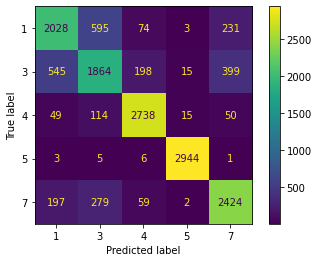

In [9]:
plot_confusion_matrix(selector, X_test, y_test) 
plt.show()

In [10]:
# metrics.plot_roc_curve(selector, X_test, y_test)
roc_auc_score(y_test, selector.predict_proba(X_test), multi_class='ovr')

0.880624496991836

### Visualizing the tree

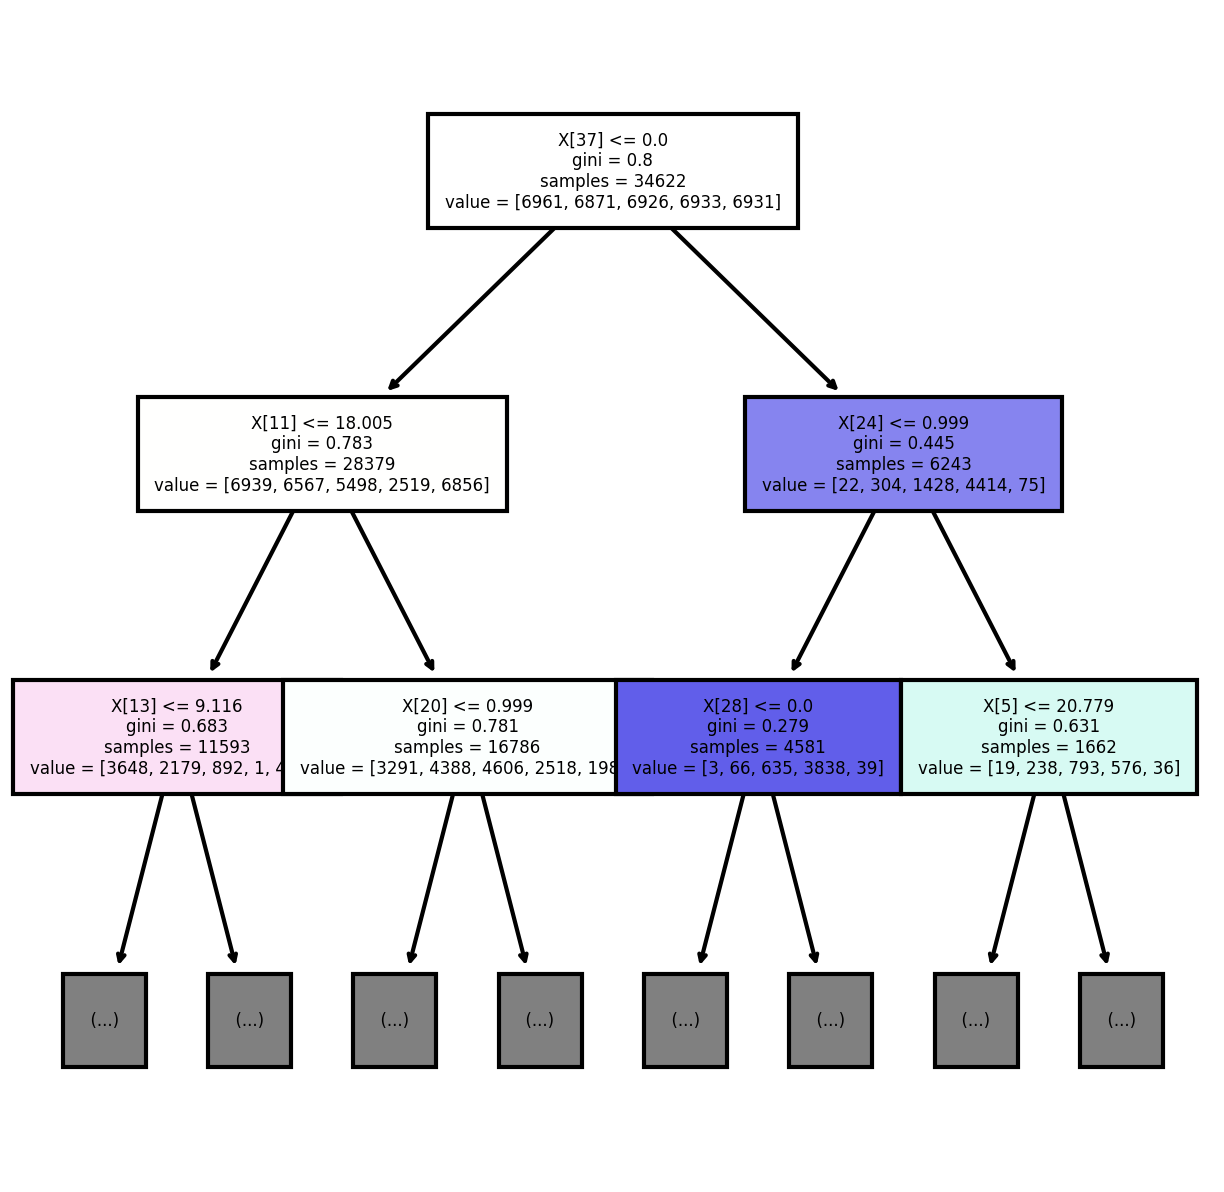

In [11]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(selector,max_depth=2, filled=True,fontsize=4)
plt.show()

# Random Forest Classifier

**4.1 Method 2**

### Q: What assumptions need to be verified at this step?
+ A: Suppose, STATISTICAL_MURDER_FLAG represents the safety of the neighbourhood as it says if the shooting resulted in a murder of the victim, we want to see if we can predict the safety of a location for a given particular time.

### Q: What algorithm did you choose?
+ A: Random Forest Classifier.

### Q: Why you choose this algorithm?
+ A: Random forest Classifiers are robust to outliers and works well for non-linear data. As only few number of murders were reported, we don't want any overfitting of the data. We know that Random forest classifiers works well for large datasets and low risk of overfitting.
### Q: What metric can measure the quality of your algorithm?
+ A: Since accuracy score may not give the correct analysis due to our imbalanced dataset, we use AUC curve and Confusion matrix and Precision and recall to predict if a location is safe or not in a particular time.

### Q: What is the outcome?
+ A: We got an accuracy of 78% and Area under the curve as 0.86 which is good enough for the dataset we have.

### Q: Analysis and discussion:
+ A: Although 78% is not as good as a model, we can see that Area under the curve is good enough. As the dataset is imbalanced, if I train my model with the original dataset, the accuracy is high but f1_score is zero and the model always tries to classify location as SAFE. So, I used SMOTE technique to oversample and balance the dataset. Then, I could achieve a better f1_score and AUC.

In [12]:
df = pd.read_csv('data/cleaned_NYPD.csv')

In [13]:
df['STATISTICAL_MURDER_FLAG'].value_counts()

0    11225
1     2835
Name: STATISTICAL_MURDER_FLAG, dtype: int64

In [14]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
y = df['STATISTICAL_MURDER_FLAG']
# X = df.drop(['X_COORD_CD','Y_COORD_CD','Lon_Lat','INCIDENT_KEY','STATISTICAL_MURDER_FLAG','time_SECOND'],axis=1)
X = df[['DAY','MONTH','YEAR','time_HOUR','time_MINUTE','Latitude','Longitude']]

### Since we have very less instances of MURDER ie., very less instances of '1' compared to '0', we balance the dataset using SMOTE technique

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [16]:
print(y_sm.value_counts())

0    11225
1    11225
Name: STATISTICAL_MURDER_FLAG, dtype: int64


In [17]:

from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import r2_score,accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
# selector = RandomForestClassifier(random_state=0)
selector = RandomForestClassifier(random_state=0)
# selector = RFE(estimator, n_features_to_select=5, step=1)
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = StandardScaler()
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)
selector = selector.fit(X_train, y_train)
# selector.support_
# selector.score(X_test,y_test)croscross 
y_pred = selector.predict(X_test)
# accuracy_score(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.7848552338530067

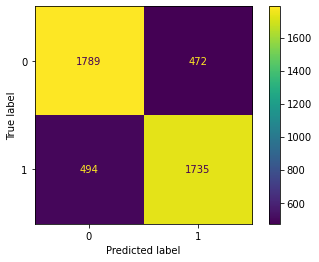

In [18]:
plot_confusion_matrix(selector, X_test, y_test) 
plt.show()

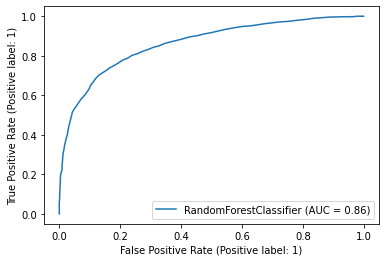

In [19]:
plot_roc_curve(selector, X_test, y_test)

In [20]:
print(classification_report(y_test, y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      2261
           1       0.79      0.78      0.78      2229

    accuracy                           0.78      4490
   macro avg       0.78      0.78      0.78      4490
weighted avg       0.78      0.78      0.78      4490



In [21]:
import numpy as np
treefeatures=selector.feature_importances_
indices = np.argsort(treefeatures)

In [22]:
features = X.columns

Text(0.5, 0, 'Relative Importance')

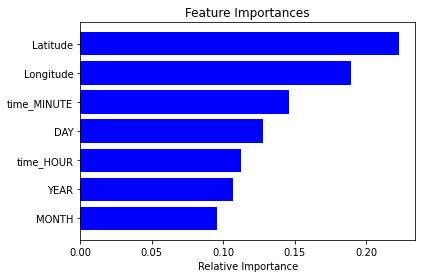

In [23]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), treefeatures[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# KMEANS

**4.1 Method 3**

#### Q: What assumptions need to be verified at this step?
+ A: Suppose, police wants to patrol the cities in most-crime happening places. Let us assume that police knows all the crime locations and the time that the crime is occuring. We want to help them decide the locations and time where more patrolling has to be done.

#### Q: What algorithm did you choose?
+ A: KMEANS CLUSTERING

#### Q: Why you choose this algorithm?
+ A: The ability to notice otherwise unseen patterns and to come up with a model to generalize those patterns onto observations is precisely why tools like PCA and k-means are essential in any data science project. After observing the data, we don't know how many prime crime locations there are and what is the prime time, and we don't have labelled ground truth data. So we need a clustering algorithm. Kmeans clustering is one of the most popular clustering algorithms. Therefore, we choose k-means algorithm. We did PCA to map my data to 2 dimension for k-means algorithm.

#### Q: What metric can measure the quality of your algorithm?
+ A: We use explained variance ratio and silhouette_score to determine the goodness of the clustering.

#### Q: What is the outcome?
+ A: The best score we could achieve is with 7 clusters.

#### Q: Analysis and discussion:
+ A: As we could see the explained variance ratio, almost 60% of the data is given by only 2 components. So, with PCA we could all the data in the features to just two input features and then proceed for modelling. But, since 40% of the data is missing, we could achieve a silhouette_score of 0.38. Anyway, we are able to classify the location and crime data into 7 different clusters and we could see the locations and time of crime where police has to do patrolling from the centroids of each clusters .

In [24]:
df = pd.read_csv('data/cleaned_NYPD.csv')

### Determining the ideal number of clusters for our k-means model can be done by measuring the sum of the squared distances to the nearest cluster center aka inertia.

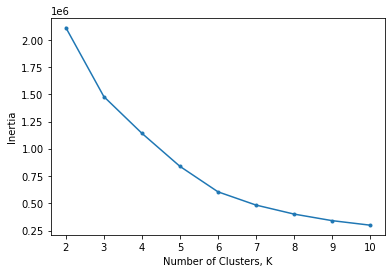

In [25]:
from sklearn.cluster import KMeans
inertia = []
X = df[['Longitude','Latitude','time_HOUR','time_MINUTE']]
for K in range(2,11):
    
    kmeans = KMeans(n_clusters=K)
    
    kmeans.fit((X))
    inertia.append(kmeans.inertia_)
    
plt.plot(range(2,11),inertia,marker = '.');
plt.xlabel('Number of Clusters, K');
plt.ylabel('Inertia');
plt.annotate(xy=(3.5,3),xytext = (3.5,3.5),text='Elbow', arrowprops={});

### Figure shows that after 6 clusters at (the elbow) the change in the value of inertia is no longer significant and most likely, neither is the variance of the rest of the data after the elbow point. Therefore we can discard everything after k=6 and proceed to the last step in the process.

In [26]:
from sklearn import metrics
from sklearn.decomposition import PCA
pca = PCA(2)
# X = df[['time_HOUR','time_MINUTE','Latitude','Longitude']]
X = df[['Latitude','Longitude','time_HOUR','time_MINUTE']]
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
for n in range(3,10):
    X_scaled = scaler.fit_transform(X)
    X1 = pca.fit_transform(X_scaled)
    X1_scaled = scaler.fit_transform(X1)
    kmeans = KMeans(n_clusters=n, random_state=0)
    labels = kmeans.fit_predict(X1)
    print('For cluster {} the silhouette score is {}'.format(n,metrics.silhouette_score(X1_scaled,labels)))

For cluster 3 the silhouette score is 0.35732840432389834
For cluster 4 the silhouette score is 0.364861725296436
For cluster 5 the silhouette score is 0.3785977953011936
For cluster 6 the silhouette score is 0.38676437109981626
For cluster 7 the silhouette score is 0.3833832954847445
For cluster 8 the silhouette score is 0.3719589537855247
For cluster 9 the silhouette score is 0.37641058483232154


### As we could see above, we could acheive the maximum silhouette score with 7 clusters.

In [27]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(2)
# X = df[['time_HOUR','time_MINUTE','Latitude','Longitude']]
X = df[['Latitude','Longitude','time_HOUR','time_MINUTE']]
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X1 = pca.fit_transform(X_scaled)
X1_scaled = scaler.fit_transform(X1)
kmeans = KMeans(n_clusters=7, random_state=0)
labels = kmeans.fit_predict(X1)
print('For cluster {} the silhouette score is {}'.format(7,metrics.silhouette_score(X1_scaled,labels)))

For cluster 7 the silhouette score is 0.3833832954847477


### Most of the data in the dataset can be taken from two components by doing PCA

In [28]:
 print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.29074371 0.25948201]


### Can crimes be grouped based on features like location and time? Reducing all those features down to principal components and then visualizing the clusters in those principal components using k-means hints that the answer to my question is most likely yes.

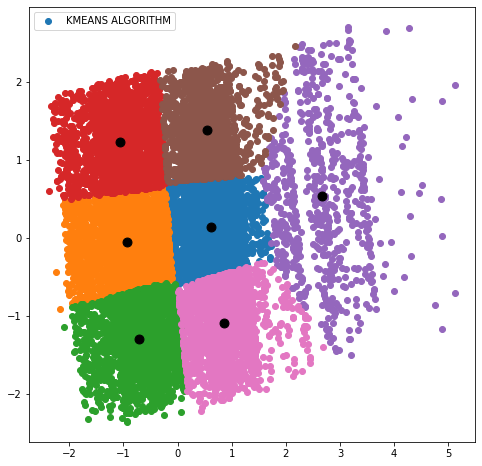

In [29]:
u_labels = np.unique(labels)
#Getting the Centroids
centroids = kmeans.cluster_centers_
# print(u_labels)
plt.figure(figsize=(8, 8))
for i in u_labels:
    filtered_label = X1[labels == i]
    plt.scatter(filtered_label[:,0] , filtered_label[:,1])
#     plt.scatter(X1[kmeans == i , 0] , X1[kmeans == i , 1] , kmeans = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend(['KMEANS ALGORITHM'])
plt.show()

### The centroids shown in the graph are the prime location and time of each cluster where there should be more patroling

In [30]:
centroids

array([[ 0.61546355,  0.13396564],
       [-0.93754083, -0.05433917],
       [-0.71906147, -1.29686115],
       [-1.05658727,  1.23605041],
       [ 2.67078846,  0.53693003],
       [ 0.53768578,  1.38375769],
       [ 0.86393603, -1.08505162]])

# Logistic Regression

**4.1 Method 4**

### Q: What assumptions need to be verified at this step?
+ A: Suppose there is crime happened at a particular location at a particular time and we know all the victim's details like age, sex and race. We want to see what is the most probable race of the perpetrator

### Q: What algorithm did you choose?
+ A: Logistic Regression

### Q: Why you choose this algorithm?
+ A: As we assumed that observations are independent to each other and also, we have large enough dataset to work with simple classification algorithm like Logistic, we chose this. and also, Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval independent variables.

### Q: What metric can measure the quality of your algorithm?
+ A: We use confusion matrix (precison and recall) and Area under the curve to check the goodness the model

### Q: What is the outcome?
+ A: We could achieve 62% accuracy and AUC of 0.87 which says our models is good enough with decent precision and recall for each class

### Q: Analysis and discussion:
+ A: According to the metric values we got, our model is good enough since we have 5 different classes and although the accuracy is low, we could achieve better area under the curve. As data is skewed, I used SMOTE technique to oversample the data and predict. From the classification report, we can say that both precision and recall are good enough. If you are a police inspector and you want to catch criminals, you want to be sure that the person you predicted the criminal's RACE correct(Precision) and you also want to capture as many criminals (Recall) as possible. The F1 score manages this tradeoff.</i>

In [31]:
df = pd.read_csv('data/cleaned_NYPD.csv')

In [32]:
df['PERP_RACE'].value_counts()

2    12120
6     1101
3      607
5      175
1       55
0        2
Name: PERP_RACE, dtype: int64

### Since the count of the class '0' is just two, we will eliminate the class '0'

In [33]:
df = df[- df['PERP_RACE'].isin([0])]

In [34]:
df['PERP_RACE'].value_counts()

2    12120
6     1101
3      607
5      175
1       55
Name: PERP_RACE, dtype: int64

In [35]:
# PERP_AGE_GROUP, PERP_SEX, PERP_RACE, VIC_AGE_GROUP, VIC_SEX, VIC_RACE
df_model = df.copy()
df_model_dummy = pd.get_dummies(data=df_model, columns=['PERP_SEX', 'PERP_AGE_GROUP','VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE','BORO'],drop_first=True)
# df_model_dummy.info()

In [36]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
y = df[['PERP_RACE']]
# y = pd.get_dummies(data=df['PERP_AGE_GROUP'],drop_first=True)
# X = df_model_dummy.drop(['PERP_AGE_GROUP','X_COORD_CD','Y_COORD_CD','Lon_Lat','INCIDENT_KEY','PERP_AGE_GROUP_MIN','PERP_AGE_GROUP_MAX','time_SECOND','PERP_AGE_MEAN'],axis=1)
X = df_model_dummy.drop(['PERP_RACE','X_COORD_CD','Y_COORD_CD','Lon_Lat','INCIDENT_KEY','time_SECOND'],axis=1)
# X.info()
# X.head()

### SMOTE oversampling

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

### As we don't know if there is a linear relationship between features, we do PCA and extract the import features and then apply Logistic in the PCA space. For that, we first normalize the data and apply PCA and then normalize the data and then apply our model.

In [38]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
# X = df_model_dummy.drop(['X_COORD_CD','Y_COORD_CD','Lon_Lat','INCIDENT_KEY','PERP_RACE'],axis=1)
# # X = df[['Longitude','Latitude','DAY','MONTH','YEAR','time_HOUR','time_MINUTE']]
# y = df['PERP_RACE']
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
# scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_sm)
# X_test_scaled = scaler.fit_transform(X_test)
from sklearn.decomposition import PCA
pca_race = PCA()
principalComponents_breast = pca_race.fit_transform(X_scaled)
# print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

# print(clf.score(X_test,y_test))


Text(0, 0.5, 'cumulative explained variance')

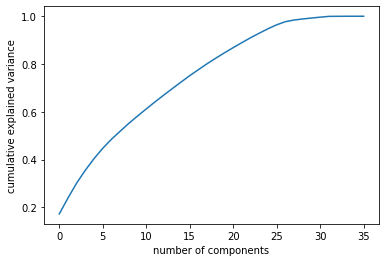

In [39]:
plt.plot(np.cumsum(pca_race.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### We can see that after number_of_components=28, the variance is almost same, so it does not make difference after that even if we consider features.

In [40]:
pca_race = PCA(n_components=28)
principalComponents_breast = pca_race.fit_transform(X_scaled)
X1 = pca_race.fit_transform(X_scaled)
scaler = StandardScaler()
# scaler = MinMaxScaler()
X1_scaled = scaler.fit_transform(X1)
X_train, X_test, y_train, y_test = train_test_split(X1_scaled,y_sm,test_size=0.2, random_state = 42)

# majority_class = y_train.mode()[0]
# y_pred = np.full_like(y_test, fill_value = majority_class)
# accuracy_score(y_test, y_pred)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000)
clf.fit(X_train, y_train)

# from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
# y_pred_val = cl.predict(X_val)
y_pred_test = clf.predict(X_test)
# print('Accuracy for the validation data= ',accuracy_score(y_val, y_pred_val))
print('Accuracy for the test data= ',accuracy_score(y_test, y_pred_test))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy for the test data=  0.6193069306930693


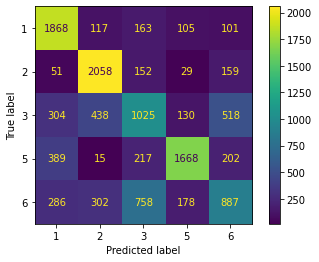

In [41]:
plot_confusion_matrix(clf, X_test, y_test) 
plt.show()

In [42]:
print(classification_report(y_test, y_pred_test, zero_division=1))

              precision    recall  f1-score   support

           1       0.64      0.79      0.71      2354
           2       0.70      0.84      0.77      2449
           3       0.44      0.42      0.43      2415
           5       0.79      0.67      0.73      2491
           6       0.48      0.37      0.41      2411

    accuracy                           0.62     12120
   macro avg       0.61      0.62      0.61     12120
weighted avg       0.61      0.62      0.61     12120



In [43]:
metrics.roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

0.8805033945429827

# KNN Neighbours

**4.1 Method 5**

### Q: What assumptions need to be verified at this step?
+ A:  Suppose, we want to estimate the BOROUGH in which crime might occur for a given crime details like time, victim details, criminal details etc.,

### Q: What algorithm did you choose?
+ A: K-Nearest Neighbors

### Q: Why you choose this algorithm?
+ A: The data is in feature space, which means data in feature space can be measured by distance metrics such as Manhattan, Euclidean, etc. We assume that Each of the training data points consists of a set of vectors and a class label associated with each vector. This is easy to implement and is a non-parametric algorithm.

### Q: What metric can measure the quality of your algorithm?
+ A: We use confusion matrix (precison and recall) and Area under the curve to check the goodness the model.

### Q: What is the outcome?
+ A: We could achieve 88% accuracy and AUC of 0.97 which says our models is good enough with decent precision and recall for each class.

### Q: Analysis and discussion:
+ A: Based on the crime details like time and criminal details and victim details, we could perfectly classify the location where this type of crime could occur. If you are a police inspector and you want to catch criminals, you want to be sure about the crime location(Precision) and you also want to capture as many crime locations (Recall) as possible. The F1 score manages this tradeoff.

In [44]:
df = pd.read_csv('data/cleaned_NYPD.csv')

In [45]:
df_model = df.copy()
df_model_dummy = pd.get_dummies(data=df_model, columns=['PERP_RACE', 'PERP_SEX', 'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE','PERP_RACE'],drop_first=True)
# # df_model_dummy

In [46]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
# y = df_model_dummy[['BORO_1','BORO_2','BORO_3','BORO_4']]
y = df[['BORO']]
# y = pd.get_dummies(data=df['PERP_AGE_GROUP'],drop_first=True)
X = df_model_dummy.drop(['X_COORD_CD','Y_COORD_CD','Lon_Lat','INCIDENT_KEY','PERP_AGE_GROUP','PERP_AGE_GROUP_MIN','PERP_AGE_GROUP_MAX','time_SECOND','PERP_AGE_MEAN','BORO'],axis=1)
# X.head()

In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X.to_numpy(), y.to_numpy())

In [48]:
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import 
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
# model = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
# y = pd.get_dummies(df['BORO'])
# y = df_model_dummy[['BORO_1','BORO_2','BORO_3','BORO_4']]
# X = df_model_dummy.drop(['X_COORD_CD','Y_COORD_CD','Lon_Lat','INCIDENT_KEY','BORO_1','BORO_2','BORO_3','BORO_4'],axis=1)
# X = df_model_dummy[['Latitude','Longitude','MONTH','DAY','YEAR','BORO_1','BORO_2','BORO_3','BORO_4','PRECINCT']]
# poly = PolynomialFeatures(degree=2)
# X = poly.fit_transform(X)
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_sm)
# from sklearn.decomposition import PCA
# pca_breast = PCA(n_components=30)
# principalComponents_breast = pca_breast.fit_transform(X_scaled)
# print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))
# X1 = pca.fit_transform(X_scaled)
# X1_scaled = scaler.fit_transform(X1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_sm,test_size=0.2, random_state = 42)
# print(y_train.shape)

model = KNeighborsClassifier(n_neighbors=5)
# model = RFE(model, n_features_to_select=5)
model = model.fit(X_train, y_train)
# # selector.support_
# # selector.score(X_test,y_test)croscross 
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)



0.877879403794038

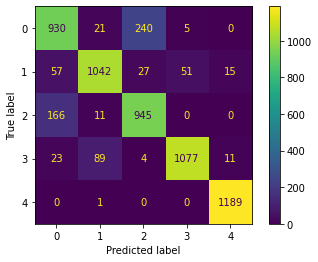

In [49]:
plot_confusion_matrix(model, X_test, y_test) 
plt.show()

In [50]:
metrics.roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

0.9766894317578323

In [51]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1176
           1       0.87      0.90      0.88      1164
           2       0.84      0.78      0.81      1216
           3       0.89      0.95      0.92      1133
           4       1.00      0.98      0.99      1215

    accuracy                           0.88      5904
   macro avg       0.88      0.88      0.88      5904
weighted avg       0.88      0.88      0.88      5904

